In [1]:
!pip install -q qiskit
!pip install -q pylatexenc
#!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install qiskit-aer

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.9 MB/s eta 0:00:00


#### Loading data

In [17]:
import pandas as pd

In [18]:
nodes = pd.read_csv("data/nodes.csv")
nodes.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [19]:
edges = pd.read_csv("data/edges.csv")
edges.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [20]:
hero_network = pd.read_csv("data/hero-network.csv")
hero_network.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


#### Graphing network

In [21]:
import networkx as nx

In [22]:
graph = nx.from_pandas_edgelist(hero_network, source = "hero1", target = "hero2")

In [23]:
print('Number of nodes', len(graph.nodes))
print('Number of edges', len(graph.edges))
print('Average degree', sum(dict(graph.degree).values()) / len(graph.nodes))

Number of nodes 6426
Number of edges 167219
Average degree 52.044506691565516


In [35]:
def info(k):
  print('Number of nodes', len(k.nodes))
  print('Number of edges', len(k.edges))
  print('Average degree', sum(dict(k.degree).values()) / len(k.nodes))

In [24]:
print("Network Density: ", nx.density(graph))

Network Density:  0.00810031232553549


In [25]:
heroes = {'MEDUSA/MEDUSALITH AM','ARCLIGHT/PHILLIPA SO','WOLVERINE/LOGAN ','SCARLET WITCH/WANDA ',
          'ARAGORN','OVERMIND/GROM','BATTLEAXE/','ION/', 'PINK PEARL/'}
relations = hero_network[(hero_network.hero1.isin(heroes)) & (hero_network.hero2.isin(heroes))]
relations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 895 to 573288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hero1   103 non-null    object
 1   hero2   103 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [26]:
subgraph = nx.from_pandas_edgelist(relations, source = "hero1", target = "hero2")
print('Number of nodes', len(subgraph.nodes))
print('Number of edges', len(subgraph.edges))
print('Average degree', sum(dict(subgraph.degree).values()) / len(subgraph.nodes))
print("\nNetwork Density:", nx.density(subgraph))

Number of nodes 9
Number of edges 13
Average degree 2.888888888888889

Network Density: 0.3611111111111111


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("dark")

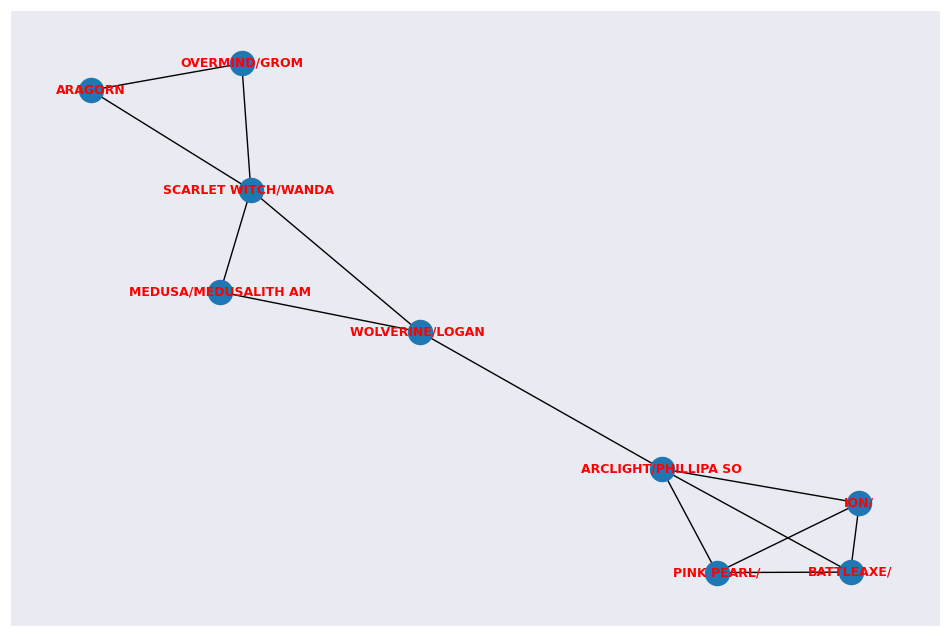

In [28]:
plt.figure(figsize = (12, 8))
#plt.title("Network Graph of Marvel Characters' Interactions")
nx.draw_networkx(subgraph, font_size = 9, font_color = "red", font_weight = "bold", font_family = "DejaVu Sans")

In [29]:
## The diameter is a measure of the number of steps it takes to travel between the outermost nodes
print("Diameter of a subgraph:", nx.diameter(subgraph))

Diameter of a subgraph: 4


In [30]:
## shortest_path calculates number of nodes between the most distant nodes. This includes the distant nodes as well
shortest_path = nx.shortest_path(subgraph, source = "OVERMIND/GROM", target = "ION/")
print("Shortest path between Overmind and Ion is: ")
for item in shortest_path:
    print("- ", item)

print("With length:", len(shortest_path))

Shortest path between Overmind and Ion is: 
-  OVERMIND/GROM
-  SCARLET WITCH/WANDA 
-  WOLVERINE/LOGAN 
-  ARCLIGHT/PHILLIPA SO
-  ION/
With length: 5


In [31]:
## A measure for how close to the centre each node is
nx.eccentricity(subgraph)

{'SCARLET WITCH/WANDA ': 3,
 'WOLVERINE/LOGAN ': 2,
 'MEDUSA/MEDUSALITH AM': 3,
 'ARAGORN': 4,
 'OVERMIND/GROM': 4,
 'ARCLIGHT/PHILLIPA SO': 3,
 'ION/': 4,
 'BATTLEAXE/': 4,
 'PINK PEARL/': 4}

In [ ]:
## A measure for how many edges are connected to each node
dict(subgraph.degree(subgraph.nodes()))

{'SCARLET WITCH/WANDA ': 4,
 'WOLVERINE/LOGAN ': 3,
 'MEDUSA/MEDUSALITH AM': 2,
 'ARAGORN': 2,
 'OVERMIND/GROM': 2,
 'ARCLIGHT/PHILLIPA SO': 4,
 'ION/': 3,
 'BATTLEAXE/': 3,
 'PINK PEARL/': 3}

In [32]:
scarlet_arclight_path = nx.shortest_path(subgraph, source = "SCARLET WITCH/WANDA ", target = "ARCLIGHT/PHILLIPA SO")
print("Shortest path between Scarlet and Arclight is: ")
for item in scarlet_arclight_path:
    print("- ", item)

print("With length:", len(scarlet_arclight_path))

Shortest path between Scarlet and Arclight is: 
-  SCARLET WITCH/WANDA 
-  WOLVERINE/LOGAN 
-  ARCLIGHT/PHILLIPA SO
With length: 3


In [33]:
## Betweenness centrality denotes the fraction of all the shortest paths that pass through a particular node.
nx.betweenness_centrality(subgraph)

{'SCARLET WITCH/WANDA ': 0.42857142857142855,
 'WOLVERINE/LOGAN ': 0.5714285714285714,
 'MEDUSA/MEDUSALITH AM': 0.0,
 'ARAGORN': 0.0,
 'OVERMIND/GROM': 0.0,
 'ARCLIGHT/PHILLIPA SO': 0.5357142857142857,
 'ION/': 0.0,
 'BATTLEAXE/': 0.0,
 'PINK PEARL/': 0.0}

In [34]:
## Community identification within the network
from networkx.algorithms import community
for item in community.greedy_modularity_communities(subgraph):
    print("\n Community:")
    for hero in item:
        print("-", hero)


 Community:
- OVERMIND/GROM
- ARAGORN
- MEDUSA/MEDUSALITH AM
- SCARLET WITCH/WANDA 
- WOLVERINE/LOGAN 

 Community:
- ARCLIGHT/PHILLIPA SO
- ION/
- BATTLEAXE/
- PINK PEARL/


In [ ]:
modularity_dict = {}
for i,c in enumerate(community.greedy_modularity_communities(subgraph)):
    for name in c:
        modularity_dict[name] = i
modularity_dict

{'OVERMIND/GROM': 0,
 'WOLVERINE/LOGAN ': 0,
 'MEDUSA/MEDUSALITH AM': 0,
 'SCARLET WITCH/WANDA ': 0,
 'ARAGORN': 0,
 'BATTLEAXE/': 1,
 'ION/': 1,
 'ARCLIGHT/PHILLIPA SO': 1,
 'PINK PEARL/': 1}

In [36]:
## Size and density of both communities
comm = community.greedy_modularity_communities(subgraph)

l = list(map(lambda c: list(c), comm))

k = subgraph.subgraph(l[0])
print(info(k))
print("\nNetwork Density: %.2f \n"%nx.density(k))


k2 = subgraph.subgraph(l[1])
print(info(k2))
print("\nNetwork Density: %.2f \n"%nx.density(k2))

Number of nodes 5
Number of edges 6
Average degree 2.4
None

Network Density: 0.60 

Number of nodes 4
Number of edges 6
Average degree 3.0
None

Network Density: 1.00 



In [37]:
print("Shortest paths: ")
sp = nx.eccentricity(k)
for hero in sp:
    print("-", hero, ": ", sp[hero])

ce = dict(subgraph.degree(k.nodes()))
print("\nConnected Edges")
for hero in ce:
    print("-", hero, ":", ce[hero])

bet = nx.betweenness_centrality(k)
print("\nBetweenness")
for hero in bet:
    print("-", hero, ":", bet[hero])

Shortest paths: 
- SCARLET WITCH/WANDA  :  1
- WOLVERINE/LOGAN  :  2
- MEDUSA/MEDUSALITH AM :  2
- ARAGORN :  2
- OVERMIND/GROM :  2

Connected Edges
- SCARLET WITCH/WANDA  : 4
- WOLVERINE/LOGAN  : 3
- MEDUSA/MEDUSALITH AM : 2
- ARAGORN : 2
- OVERMIND/GROM : 2

Betweenness
- SCARLET WITCH/WANDA  : 0.6666666666666666
- WOLVERINE/LOGAN  : 0.0
- MEDUSA/MEDUSALITH AM : 0.0
- ARAGORN : 0.0
- OVERMIND/GROM : 0.0


In [38]:
def max_cut(assigned_nodes, edges):
    return sum(edges.apply(
        lambda edge: (1- assigned_nodes[edge['hero1']]*assigned_nodes[edge['hero2']])/2, axis = 1))

In [39]:
### Assignment to groups via string check
edges = relations
edges['check_string'] = edges.apply(lambda row: "".join(sorted([row['hero1'], row['hero2']])), axis = 1)
edges = edges.drop_duplicates('check_string')
edges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 895 to 390162
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   hero1         13 non-null     object
 1   hero2         13 non-null     object
 2   check_string  13 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


<ipython-input-39-3e341217f9c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges['check_string'] = edges.apply(lambda row: "".join(sorted([row['hero1'], row['hero2']])), axis = 1)


In [40]:
single_group =  {name: -1 for name in heroes}
single_group

{'ARCLIGHT/PHILLIPA SO': -1,
 'ION/': -1,
 'SCARLET WITCH/WANDA ': -1,
 'WOLVERINE/LOGAN ': -1,
 'PINK PEARL/': -1,
 'OVERMIND/GROM': -1,
 'MEDUSA/MEDUSALITH AM': -1,
 'ARAGORN': -1,
 'BATTLEAXE/': -1}

In [41]:
max_cut(single_group, edges)

0.0

In [42]:
### Random assignment
from random import seed, random
seed(None)

random_groups = {name: -1 if round(random()) == 0 else 1 for name in heroes}
random_groups

{'ARCLIGHT/PHILLIPA SO': 1,
 'ION/': -1,
 'SCARLET WITCH/WANDA ': -1,
 'WOLVERINE/LOGAN ': 1,
 'PINK PEARL/': 1,
 'OVERMIND/GROM': 1,
 'MEDUSA/MEDUSALITH AM': -1,
 'ARAGORN': -1,
 'BATTLEAXE/': 1}

In [43]:
max_cut(random_groups, edges)

7.0

In [44]:
def search(group, open_heroes):
    best = (0, None)

    open_heroes = list(open_heroes)
    if len(open_heroes) > 0:
        new = dict(group)
        new[open_heroes[0]] = new[open_heroes[0]]*(-1)

        result1 = search(group, open_heroes[1:])
        result2 = search(new, open_heroes[1:])

        best = result1 if result1[0] > result2[0] else result2
    else:
        return(max_cut(group, edges), group)

    return best

In [45]:
search(single_group, heroes)

(9.0,
 {'ARCLIGHT/PHILLIPA SO': 1,
  'ION/': 1,
  'SCARLET WITCH/WANDA ': 1,
  'WOLVERINE/LOGAN ': -1,
  'PINK PEARL/': -1,
  'OVERMIND/GROM': 1,
  'MEDUSA/MEDUSALITH AM': 1,
  'ARAGORN': -1,
  'BATTLEAXE/': -1})

#### Integer Linear Programming

In [46]:
N = heroes
E = relations
E['check_string'] = E.apply(lambda row: ''.join(sorted([row['hero1'], row['hero2']])), axis=1)
E = E.drop_duplicates('check_string')
E.head()

<ipython-input-46-95e9dfadaa00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['check_string'] = E.apply(lambda row: ''.join(sorted([row['hero1'], row['hero2']])), axis=1)


,hero1,hero2,check_string
895,SCARLET WITCH/WANDA,WOLVERINE/LOGAN,SCARLET WITCH/WANDA WOLVERINE/LOGAN
33894,MEDUSA/MEDUSALITH AM,WOLVERINE/LOGAN,MEDUSA/MEDUSALITH AMWOLVERINE/LOGAN
34882,ARAGORN,SCARLET WITCH/WANDA,ARAGORNSCARLET WITCH/WANDA
34992,SCARLET WITCH/WANDA,MEDUSA/MEDUSALITH AM,MEDUSA/MEDUSALITH AMSCARLET WITCH/WANDA
42019,SCARLET WITCH/WANDA,OVERMIND/GROM,OVERMIND/GROMSCARLET WITCH/WANDA


In [47]:
E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 895 to 390162
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   hero1         13 non-null     object
 1   hero2         13 non-null     object
 2   check_string  13 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


In [48]:
m = len(E)
n = len(N)

print("There are %d edges and %d nodes"%(m,n))

There are 13 edges and 9 nodes


In [50]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 32.8 MB/s eta 0:00:00


In [51]:
from pulp import LpMaximize, LpProblem, lpSum, LpVariable

In [52]:
maxcut = LpProblem(name = "maxcut", sense =LpMaximize)
node_partitions = LpVariable.dicts("NodePartition", N, lowBound = 0, cat = "Integer")
node_partitions

{'ARCLIGHT/PHILLIPA SO': NodePartition_ARCLIGHT_PHILLIPA_SO,
 'ION/': NodePartition_ION_,
 'SCARLET WITCH/WANDA ': NodePartition_SCARLET_WITCH_WANDA_,
 'WOLVERINE/LOGAN ': NodePartition_WOLVERINE_LOGAN_,
 'PINK PEARL/': NodePartition_PINK_PEARL_,
 'OVERMIND/GROM': NodePartition_OVERMIND_GROM,
 'MEDUSA/MEDUSALITH AM': NodePartition_MEDUSA_MEDUSALITH_AM,
 'ARAGORN': NodePartition_ARAGORN,
 'BATTLEAXE/': NodePartition_BATTLEAXE_}

In [53]:
def iter_edges():
    for (index, row) in E.iterrows():
        yield index

edge_values = LpVariable.dicts("EdgeValue", list(iter_edges()), lowBound = 0, cat = "Integer")
edge_values

{895: EdgeValue_895,
 33894: EdgeValue_33894,
 34882: EdgeValue_34882,
 34992: EdgeValue_34992,
 42019: EdgeValue_42019,
 42948: EdgeValue_42948,
 162819: EdgeValue_162819,
 389674: EdgeValue_389674,
 389680: EdgeValue_389680,
 389695: EdgeValue_389695,
 389712: EdgeValue_389712,
 389718: EdgeValue_389718,
 390162: EdgeValue_390162}

In [54]:
# add objective function
maxcut += lpSum([edge_values for i in iter_edges()])

In [55]:
# add constraints
for (index, row) in E.iterrows():
    maxcut += (edge_values[index] <= node_partitions[row["hero1"]] + node_partitions[row["hero2"]])
    maxcut += (edge_values[index] <= 2 - (node_partitions[row["hero1"]] + node_partitions[row["hero2"]]))

In [56]:
status = maxcut.solve()

In [57]:
for var in maxcut.variables():
    print("%s : %s"%(var.name, var.value()))

EdgeValue_162819 : 1.0
EdgeValue_33894 : 0.0
EdgeValue_34882 : 1.0
EdgeValue_34992 : 1.0
EdgeValue_389674 : 1.0
EdgeValue_389680 : 1.0
EdgeValue_389695 : 0.0
EdgeValue_389712 : 1.0
EdgeValue_389718 : 1.0
EdgeValue_390162 : 0.0
EdgeValue_42019 : 1.0
EdgeValue_42948 : 0.0
EdgeValue_895 : 1.0
NodePartition_ARAGORN : 1.0
NodePartition_ARCLIGHT_PHILLIPA_SO : 0.0
NodePartition_BATTLEAXE_ : 1.0
NodePartition_ION_ : 1.0
NodePartition_MEDUSA_MEDUSALITH_AM : 1.0
NodePartition_OVERMIND_GROM : 1.0
NodePartition_PINK_PEARL_ : 0.0
NodePartition_SCARLET_WITCH_WANDA_ : 0.0
NodePartition_WOLVERINE_LOGAN_ : 1.0
